In [63]:
import random
import csv
from datetime import datetime

subsystems = ['Oxygen Generator', 'CO2 Scrubber', 'Airlock', 'Water Processor']

# Initialize sensor history with normal ranges
sensor_history = {subsystem: random.uniform(80, 120) for subsystem in subsystems}

def generate_log_entry():
    subsystem = random.choice(subsystems)
    timestamp = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    # Decide the alarm level based on the following probabilities:
    # Emergency: 1%, Minor Fault: 9%, Watch: 20%, Normal: 70%
    p = random.random()
    if p < 0.01:
        alarm_level = 'Emergency'
        # Sensor value for emergency is high (161-300)
        sensor_value = random.uniform(161, 300)
    elif p < 0.01 + 0.09:
        alarm_level = 'Minor Fault'
        # Sensor value for minor fault falls between 130 and 160
        sensor_value = random.uniform(130, 160)
    elif p < 0.01 + 0.09 + 0.20:
        alarm_level = 'Watch'
        # Sensor value for watch is in the mid range (100-130)
        sensor_value = random.uniform(100, 130)
    else:
        alarm_level = 'Normal'
        # Normal sensor values are kept lower (80-100)
        sensor_value = random.uniform(80, 100)
    
    # Update the sensor history with a weighted average
    sensor_history[subsystem] = (sensor_history[subsystem] * 0.8) + (sensor_value * 0.2)
    
    return [subsystem, round(sensor_value, 2), timestamp, alarm_level]

def generate_logs(num_entries=1000):
    with open('eclss_logs.csv', 'w', newline='') as csvfile:
        log_writer = csv.writer(csvfile)
        log_writer.writerow(['Subsystem', 'SensorValue', 'Timestamp', 'AlarmLevel'])
        
        for _ in range(num_entries):
            log_entry = generate_log_entry()
            log_writer.writerow(log_entry)

if __name__ == "__main__":
    generate_logs(10000)


Decision Tree Accuracy: 100.0%


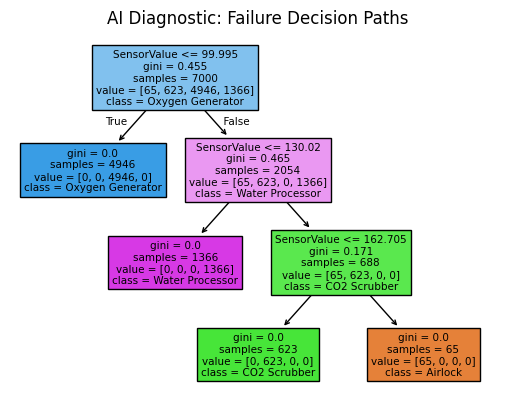


Anomaly Detection Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2972
           1       1.00      1.00      1.00        28

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Critical Events Preview:


C:\Users\moore58376\AppData\Local\Temp\ipykernel_22572\1318680076.py:91: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  logs_df = logs_df.groupby('Subsystem', group_keys=False).apply(calculate_maintenance)


,Subsystem,SensorValue,AlarmLevel,rolling_avg,maintenance_flag
7267,CO2 Scrubber,151.000000,Minor Fault,97.890000,Needs Maintenance
1362,Water Processor,231.450000,Emergency,107.390000,Needs Maintenance
4672,Oxygen Generator,150.990000,Minor Fault,106.758000,Needs Maintenance
7892,Water Processor,124.900000,Watch,138.517000,Needs Maintenance
7041,Airlock,159.330000,Minor Fault,102.179000,Needs Maintenance



Recent System Status:


,Subsystem,SensorValue,AlarmLevel,rolling_avg,maintenance_flag
9995,Oxygen Generator,97.860000,Normal,104.061000,OK
9996,Airlock,91.960000,Normal,101.456000,OK
9997,Airlock,105.680000,Watch,102.300000,OK
9998,Airlock,94.110000,Normal,103.619000,OK
9999,CO2 Scrubber,92.460000,Normal,99.226000,OK


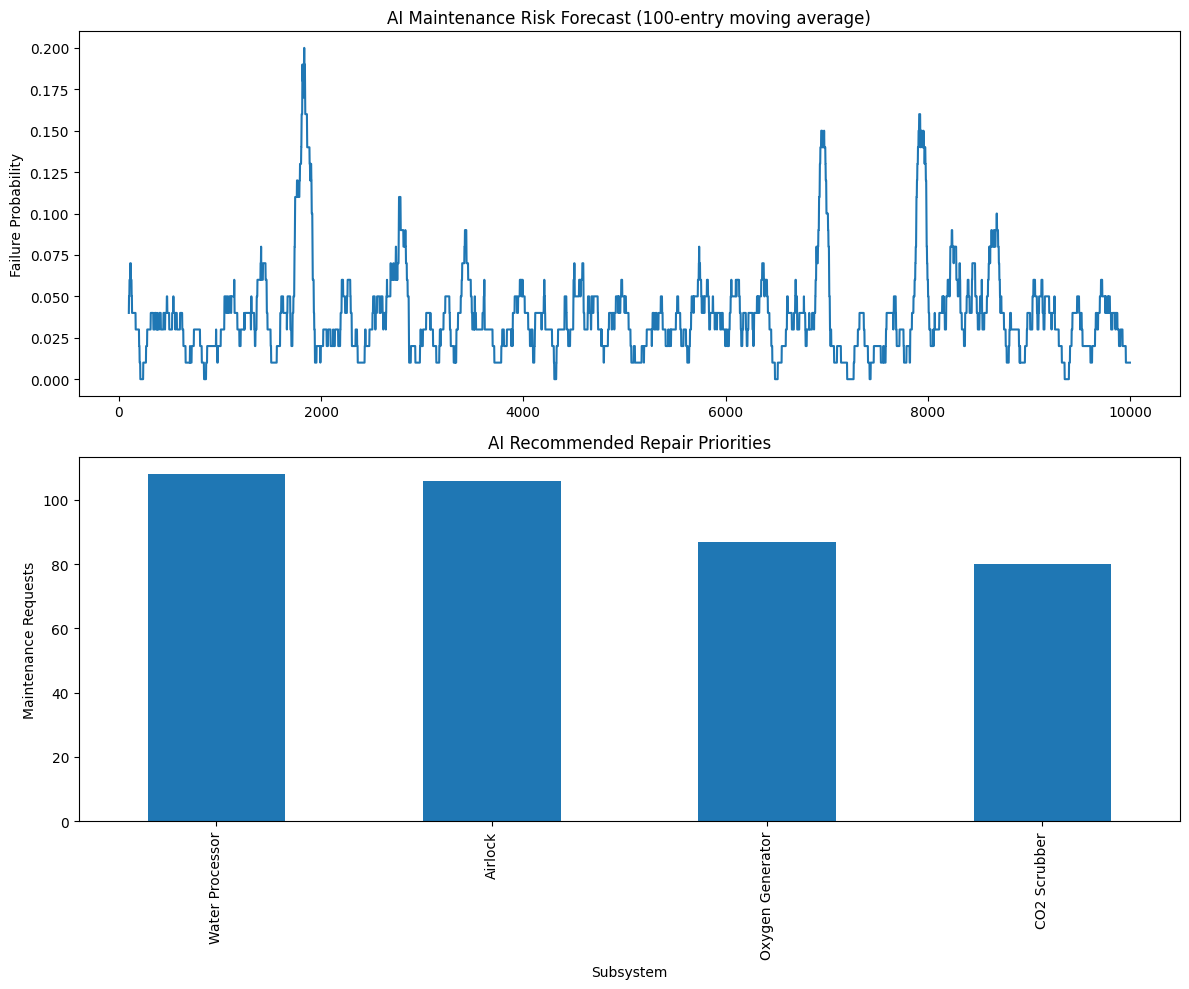


Maintenance Summary:
Total Systems: 10000
Needing Maintenance: 381 (3.8%)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Custom styling function for Jupyter
def styled_preview(df):
    """AI-Powered Diagnostic Coloring - Tags critical issues for human review"""
    styles = []
    for val in df['AlarmLevel']:
        if val == 'Normal':
            styles.append('color: green')
        elif val == 'Watch':
            styles.append('color: goldenrod; font-weight: bold')
        elif val == 'Minor Fault':
            styles.append('color: orange; font-weight: bold')
        elif val == 'Emergency':
            styles.append('color: red; font-weight: bold; background-color: yellow')
        else:
            styles.append('')
    return pd.DataFrame(styles, index=df.index, columns=['AlarmLevel'])

# Load and prepare data
logs_df = pd.read_csv('eclss_logs.csv')

# AI Component 1: Automated Feature Engineering
label_encoder = LabelEncoder()
logs_df['AlarmLevel_encoded'] = label_encoder.fit_transform(logs_df['AlarmLevel'])
logs_df['Subsystem_encoded'] = label_encoder.fit_transform(logs_df['Subsystem'])

# AI Component 2: Failure Pattern Recognition
X = logs_df[['Subsystem_encoded', 'SensorValue']]
y = logs_df['AlarmLevel_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree for Root Cause Analysis
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

print(f"Decision Tree Accuracy: {clf.score(X_test, y_test)*100:.1f}%")
tree.plot_tree(clf, feature_names=['Subsystem','SensorValue'], 
               class_names=label_encoder.classes_, filled=True)
plt.title("AI Diagnostic: Failure Decision Paths")
plt.show()

# AI Component 3: Anomaly Early Warning System
logs_df['is_emergency'] = (logs_df['AlarmLevel'] == 'Emergency').astype(int)
X_anomaly = logs_df[['Subsystem_encoded', 'SensorValue']]
y_anomaly = logs_df['is_emergency']

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(
    X_anomaly, y_anomaly, test_size=0.3, random_state=42
)

anomaly_clf = RandomForestClassifier(n_estimators=100, random_state=42)
anomaly_clf.fit(X_train_a, y_train_a)

print("\nAnomaly Detection Performance:")
print(classification_report(y_test_a, anomaly_clf.predict(X_test_a)))

# AI Component 4: Predictive Maintenance Engine
def calculate_maintenance(group):
    """AI Dynamic Threshold Adjustment - Learns normal ranges per subsystem"""
    thresholds = {
        'Oxygen Generator': 140,  # Tolerates higher baseline
        'CO2 Scrubber': 135,      # Sensitive to CO² spikes
        'Airlock': 130,           # Pressure-sensitive
        'Water Processor': 125    # Corrosion risk
    }
    
    # Rolling stability check (10-measurement window)
    group['rolling_avg'] = group['SensorValue'].rolling(
        window=10, min_periods=5
    ).mean()
    
    # Multi-factor failure prediction
    group['maintenance_flag'] = np.where(
        (group['rolling_avg'] > thresholds[group.name]) |
        (group['SensorValue'] > 150),  # Instant failure threshold
        'Needs Maintenance', 
        'OK'
    )
    return group

logs_df = logs_df.groupby('Subsystem', group_keys=False).apply(calculate_maintenance)

# AI-Powered Diagnostic Interface
print("\nCritical Events Preview:")
critical_entries = logs_df[logs_df['maintenance_flag'] == 'Needs Maintenance'].sample(5)
display(critical_entries[['Subsystem', 'SensorValue', 'AlarmLevel', 
                         'rolling_avg', 'maintenance_flag']].style.apply(styled_preview, axis=None))

print("\nRecent System Status:")
display(logs_df[['Subsystem', 'SensorValue', 'AlarmLevel', 
                'rolling_avg', 'maintenance_flag']].tail(5).style.apply(styled_preview, axis=None))

# Maintenance Outlook Visualization
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Failure Probability Forecast
(logs_df['maintenance_flag'] == 'Needs Maintenance').rolling(100).mean().plot(
    ax=ax[0], title='AI Maintenance Risk Forecast (100-entry moving average)'
)
ax[0].set_ylabel('Failure Probability')

# Resource Planning
logs_df['Subsystem'].where(logs_df['maintenance_flag'] == 'Needs Maintenance').value_counts().plot(
    kind='bar', ax=ax[1], title='AI Recommended Repair Priorities'
)
ax[1].set_ylabel('Maintenance Requests')

plt.tight_layout()
plt.show()

# Operational Summary
print("\nMaintenance Summary:")
print(f"Total Systems: {len(logs_df)}")
print(f"Needing Maintenance: {logs_df['maintenance_flag'].value_counts()['Needs Maintenance']} "
      f"({logs_df['maintenance_flag'].value_counts(normalize=True)['Needs Maintenance']*100:.1f}%)")